# Importing Libraries

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
from gen import create_pipe                             # Inpainting model
from segment import BoundingBoxSegmentationPipeline     # Segmentation model




# Segment

📦 Processing bounding box: [100, 600, 250, 1000]
✅ Generated segmentation mask
   Mask shape: (1024, 768)
   Displaying mask 1: shape=(1024, 768), dtype=uint8, range=[0, 1]


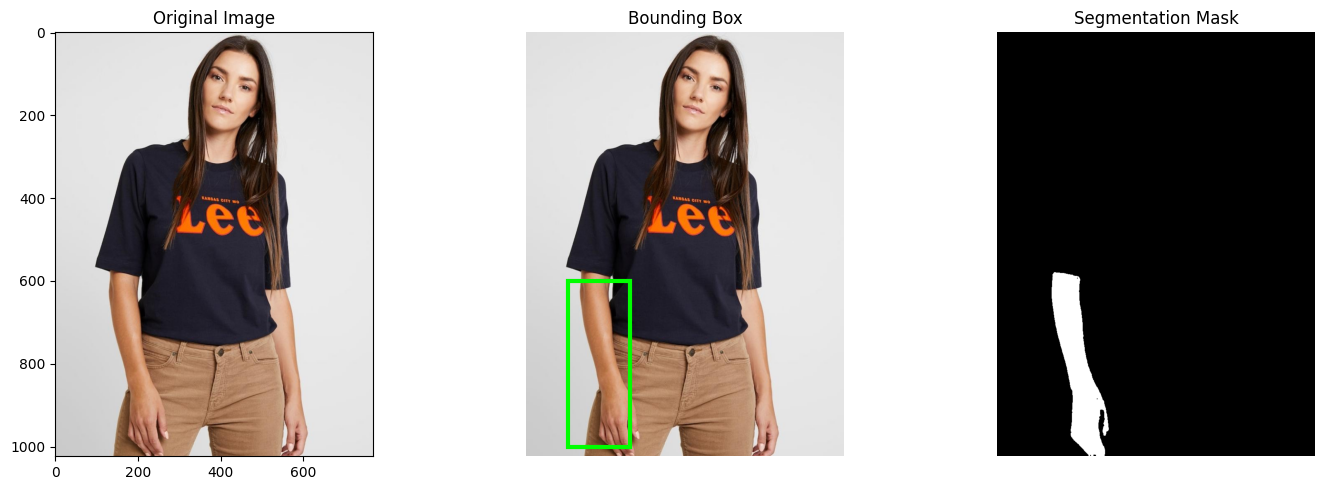

In [2]:
# Image
idx = 1
base = './Input'
filenames = os.listdir(base)
img_file = os.path.join(base,filenames[idx])
img = Image.open(img_file).convert('RGB')
width,height = img.size

# Initialize the pipeline
segmenter = BoundingBoxSegmentationPipeline(sam_model_id="./sam_model")

# Example 1: Single bounding box segmentation
# Box format: [x_min, y_min, x_max, y_max]
box = [100, 600, 250, 1000]  # Top-left (100,150) to bottom-right (300,400)
mask = segmenter.segment_with_box(img_file, box)

# # Example 2: Multiple mask candidates
# masks = segmenter.segment_with_box("your_image.jpg", box, multimask_output=True)

# # Example 3: Multiple bounding boxes
# boxes = [
#     [50, 50, 200, 200],    # First object
#     [300, 300, 450, 450],  # Second object
#     [100, 300, 250, 400]   # Third object
# ]
# all_masks = segmenter.segment_multiple_boxes("your_image.jpg", boxes)

# # Example 4: Using the __call__ method
# mask = segmenter("your_image.jpg", box=[100, 150, 300, 400])

# Inpaint

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

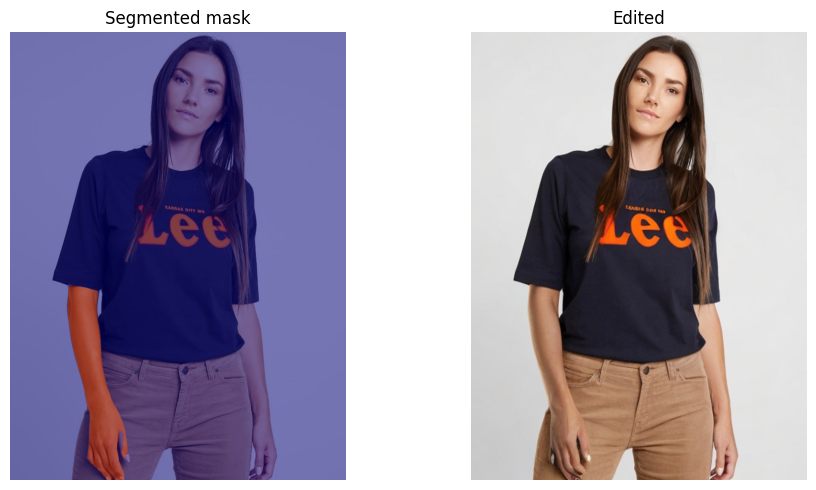

In [3]:
#Inpainting pipeline
inpainting_pipe = create_pipe(model='local_sd2_inpaint')

# Prompt
what = 'make skin color lighter.'

result = inpainting_pipe(
        prompt=what,
        image=img,
        mask_image=mask,
        num_inference_steps=150,
        guidance_scale=8.7,
    ).images[0]
result = result.resize((width, height))


fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img)
axes[0].imshow(mask, cmap='jet', alpha=0.5)
axes[0].set_title('Segmented mask')
axes[0].axis("off")

axes[1].imshow(result)
axes[1].set_title('Edited')
axes[1].axis("off")

plt.tight_layout()
plt.show()
